Imports

In [15]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import os
import pandas as pd
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

Functions 

In [16]:
def elbowmethod(data, max_cluster):
    iters = range(2, max_cluster+1, 2)
    sse = []
    for k in iters:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        sse.append(kmeans.inertia_)
    plt.plot(iters, sse, marker='o')
    plt.xlabel('Clusterzahl')
    plt.ylabel('SSE')
    plt.show()


def draw_plot():
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(data_tsne[:, 0], data_tsne[:, 1], data_tsne[:, 2], c=labels, cmap='viridis')
    # Legende hinzufügen
    legend1 = ax.legend(*scatter.legend_elements(), title="Cluster")
    ax.add_artist(legend1)
    # Achsen beschriften
    ax.set_xlabel('t-SNE 1')
    ax.set_ylabel('t-SNE 2')
    ax.set_zlabel('t-SNE 3')
    # Berechnen Sie die Inertia
    inertia = kmeans.inertia_
    # Berechnen Sie den Silhouettenkoeffizienten
    silhouette = silhouette_score(data, labels)
    print("Inertia: ", inertia)
    print("Silhouettenkoeffizient: ", silhouette)
    plt.show()

load Data and transform to df

In [17]:

# Daten laden
data_load = np.load(os.path.join(os.path.dirname(os.path.dirname(os.getcwd())), "data", "exp7_waveforms_as_one_array"
                                                                                        ".npy"))
data = data_load[2000:4000]
df = pd.DataFrame(data, columns=[f"Punkt_{i}" for i in range(48)])
df.index.name = "Wellennummer"

Scale Data

In [18]:
scaler = StandardScaler()
data_normalized = scaler.fit_transform(df)

PCA

In [19]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_normalized)
data_normalized = data_pca

Elbow Method and KMeans Clustering

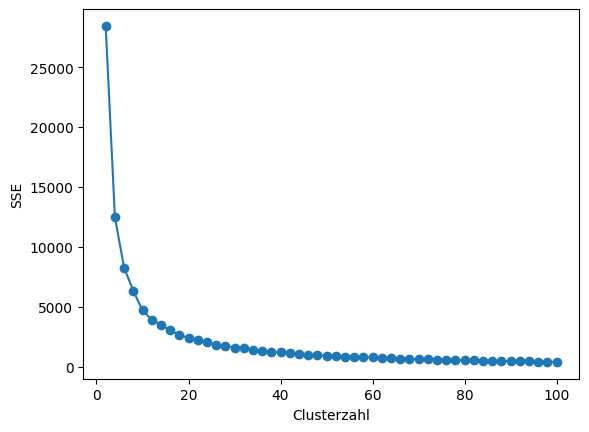

In [20]:
elbowmethod(data_normalized, max_cluster=100)

n_clusters = 6  
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(data_normalized)
labels = kmeans.labels_

t-SNE and plot

In [21]:

tsne = TSNE(n_components=3, perplexity=30, learning_rate=5, random_state=42)
data_tsne = tsne.fit_transform(data_normalized)

draw_plot()

ValueError: n_components=3 must be between 1 and min(n_samples, n_features)=2 with svd_solver='randomized'